### **Exercises of Algorithmic Toolbox Week 4**
By Group 3 of Algorithms

Universidad Nacional de Colombia

#### **1. Binary search** 

In [ ]:
seq = [int(i) for i in input().split()]
search_seq = [int(i) for i in input().split()]
n = seq[0]
seq = seq[1:]

def binary_search(seq, elt, r):
    l = 0
    while l<=r: 
        m = (l+r)//2
        if elt > seq[m]:
            l = m + 1
        elif elt < seq[m]:
            r = m - 1
        else:
            return m
    return -1

soln = list()
for i in search_seq[1:]:
    ans = binary_search(seq, i, n-1)
    soln.append(ans)
print(' '.join([str(i) for i in soln]))

#### **2. Majority element** 

In [ ]:
n = int(input())
seq = [int(i) for i in input().split()]


def divide_func(seq, l, r):
    if l+1==r:
        return seq[l]
    elif l+2==r:
        return seq[l]
    m = (l+r)//2
    left = divide_func(seq, l, m)
    right = divide_func(seq, m, r)

    c1, c2 = 0, 0
    for i in seq[l:r]:
        if i == left:
            c1+=1
        elif i == right:
            c2+=1
    if c1>(r-l)//2 and left != -1:
        return left
    elif c2>(r-l)//2 and right != -1:
        return right
    else: 
        return -1

print(int(divide_func(seq, 0, n) != -1))

#### **3. Improving QuickSort** 

In [ ]:
import sys
import random

def partition3(a, l, r):
    #write your code here
    x = a[l]
    m1 = l
    m2 = l
    for i in range(l + 1, r + 1):
    	if a[i] < x:
        	a[i],a[m1] = a[m1],a[i]
        	m1+=1
        	m2+=1
        	a[i],a[m2] = a[m2],a[i]
    	elif a[i] == x:
        	m2+=1
        	a[i],a[m2] = a[m2],a[i]
   # a[l],a[m1] = a[m1],a[l]
    return m1,m2    	    	

def partition2(a, l, r):
    x = a[l]
    j = l
    for i in range(l + 1, r + 1):
        if a[i] <= x:
            j += 1
            a[i], a[j] = a[j], a[i]
    a[l], a[j] = a[j], a[l]
    return j


def randomized_quick_sort(a, l, r):
    if l >= r:
        return
    k = random.randint(l, r)
    a[l], a[k] = a[k], a[l]
    #use partition3
    j,k = partition3(a, l, r)
    randomized_quick_sort(a, l, j-1);
    randomized_quick_sort(a, k+1, r);

if __name__ == '__main__':
    input = sys.stdin.read()
    n, *a = list(map(int, input.split()))
    randomized_quick_sort(a, 0, n - 1)
    for x in a:
        print(x, end=' ')

#### **4. Number of inversions** 

In [ ]:
def merge(left, right):
    i, j, inversion_counter = 0, 0, 0
    final = list()
    while i < len(left) and j< len(right):
        if left[i] <= right[j]:
            final.append(left[i])
            i += 1
        else:
            final.append(right[j])
            inversion_counter += len(left) - i
            j += 1

    final += left[i:]
    final += right[j:]
    return final, inversion_counter

def mergesort(arr):
    global tot_count
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    left = mergesort(arr[:mid])
    right = mergesort(arr[mid:])
    sorted_arr, temp = merge(left, right)
    tot_count += temp
    return sorted_arr

tot_count = 0
n = int(input())
seq = [int(i) for i in input().split()]
mergesort(seq)
print(tot_count)

#### **5. Organizing a lottery** 

In [ ]:
master_list = list()
s, p = [int(i) for i in input().split()]

for i in range(s):
    a, b = [int(i) for i in input().split()]
    master_list.append((a,'l'))
    master_list.append((b,'r'))

points = input().split()
for i in points:
    master_list.append((int(i),'p'))

master_list.sort()

segment_count = 0
point_segment_map = dict()
for i in master_list:
    if i[1] == 'l': segment_count += 1
    elif i[1] == 'r': segment_count -= 1
    else:
        point_segment_map[i[0]] = segment_count

temp = ''
for i in points:
    temp += str(point_segment_map[int(i)]) + ' '
print(temp[:-1])

#### **6. Closest points** 

In [ ]:
import math
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def closest_split_pair(p_x, p_y, delta, best_pair):
    ln_x = len(p_x)  
    mx_x = p_x[ln_x // 2][0]  
    s_y = [x for x in p_y if mx_x - delta <= x[0] <= mx_x + delta]
    best = delta  
    ln_y = len(s_y)  
    for i in range(ln_y - 1):
        for j in range(i+1, min(i + 5, ln_y)): 
            p, q = s_y[i], s_y[j]
            dst = dist(p, q)
            if dst < best:
                best_pair = p, q
                best = dst
    return best_pair[0], best_pair[1], best


def brute(ax):
    mi = dist(ax[0], ax[1])
    p1 = ax[0]
    p2 = ax[1]
    ln_ax = len(ax)
    if ln_ax == 2:
        return p1, p2, mi
    for i in range(ln_ax-1):
        for j in range(i + 1, ln_ax):
            if i != 0 and j != 1:
                d = dist(ax[i], ax[j])
                if d < mi:  
                    mi = d
                    p1, p2 = ax[i], ax[j]
    return p1, p2, mi


def closest_pair(ax, ay):
    ln_ax = len(ax) 
    if ln_ax <= 3:
        return brute(ax)
    mid = ln_ax // 2 
    Qx = ax[:mid]  
    Rx = ax[mid:]

    midpoint = ax[mid][0]
    Qy = list()
    Ry = list()
    for x in ay: 
        if x[0] < midpoint:
           Qy.append(x)
        else:
           Ry.append(x)
    (p1, q1, mi1) = closest_pair(Qx, Qy)
    (p2, q2, mi2) = closest_pair(Rx, Ry)
    if mi1 <= mi2:
        d = mi1
        mn = (p1, q1)
    else:
        d = mi2
        mn = (p2, q2)
    (p3, q3, mi3) = closest_split_pair(ax, ay, d, mn)
    if d <= mi3:
        return mn[0], mn[1], d
    else:
        return p3, q3, mi3


def solution(a):
    ax = sorted(a, key=lambda x: x[0])
    ay = sorted(a, key=lambda x: (x[1], x[0]))  
    p1, p2, mi = closest_pair(ax, ay)
    return mi
    
points = list()
n = int(input())
for i in range(n):
    points.append([int(i) for i in input().split()])

print(solution(points))

### Grader passed all exercises proof:

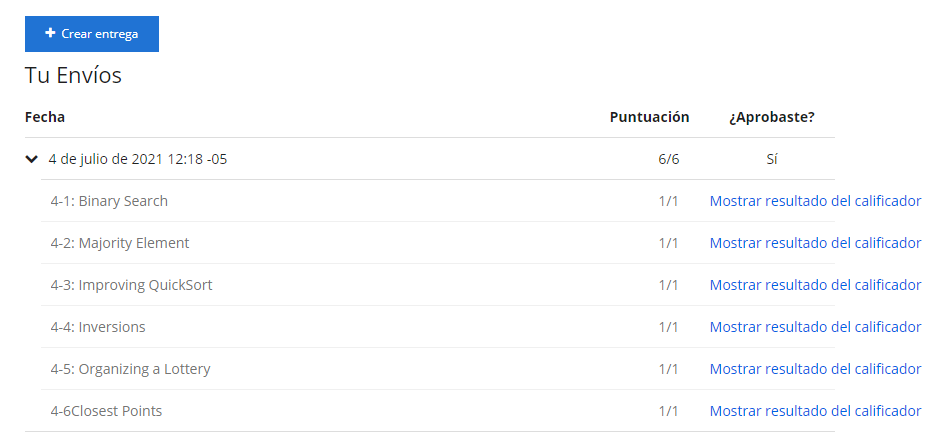